In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Exercice 1
Plot $C_p$ et $C_f$ pour différent nombres de Reynolds et incidence

In [2]:
config         = ['IVISC','VISC_RE5e4_DEF','VISC_RE5e5_DEF','VISC_RE5e6_DEF','VISC_RE5e7_DEF']
config_names   = [r'$Re\to \infty$',r'$Re = 5\times 10^4$',r'$Re = 5\times 10^5$',r'$Re = 5\times 10^6$',r'$Re = 5\times 10^7$']
config_styles  = ['-','--','-.','--',':']
config_markers = ['s','^','o','P','*','d']

aoa = [0,5,10]
dir_results = 'RESULTS'

In [3]:
data = dict()
for alfa in aoa:
    append_name = 'ALFA_{0:02d}'.format(alfa)
    data[append_name] = dict()
    for iconf,conf in enumerate(config):
        prefix = 'CP_XFOIL_2412'
        filename = '{0:s}/{1:s}_{2:s}_{3:s}.TXT'.format(dir_results,prefix,append_name,conf)
        tmp = np.loadtxt(filename,skiprows=1)
        conf_data = dict()
        conf_data['x'] = tmp[:,0]
        conf_data['Cp'] = tmp[:,1]
        if iconf > 0:
            prefix = 'BL_XFOIL_2412'
            filename = '{0:s}/{1:s}_{2:s}_{3:s}.TXT'.format(dir_results,prefix,append_name,conf)
            tmp = np.genfromtxt(filename,skip_header=1,skip_footer=23)
            conf_data['Cf'] = tmp[:,6]
        data[append_name][conf] = conf_data

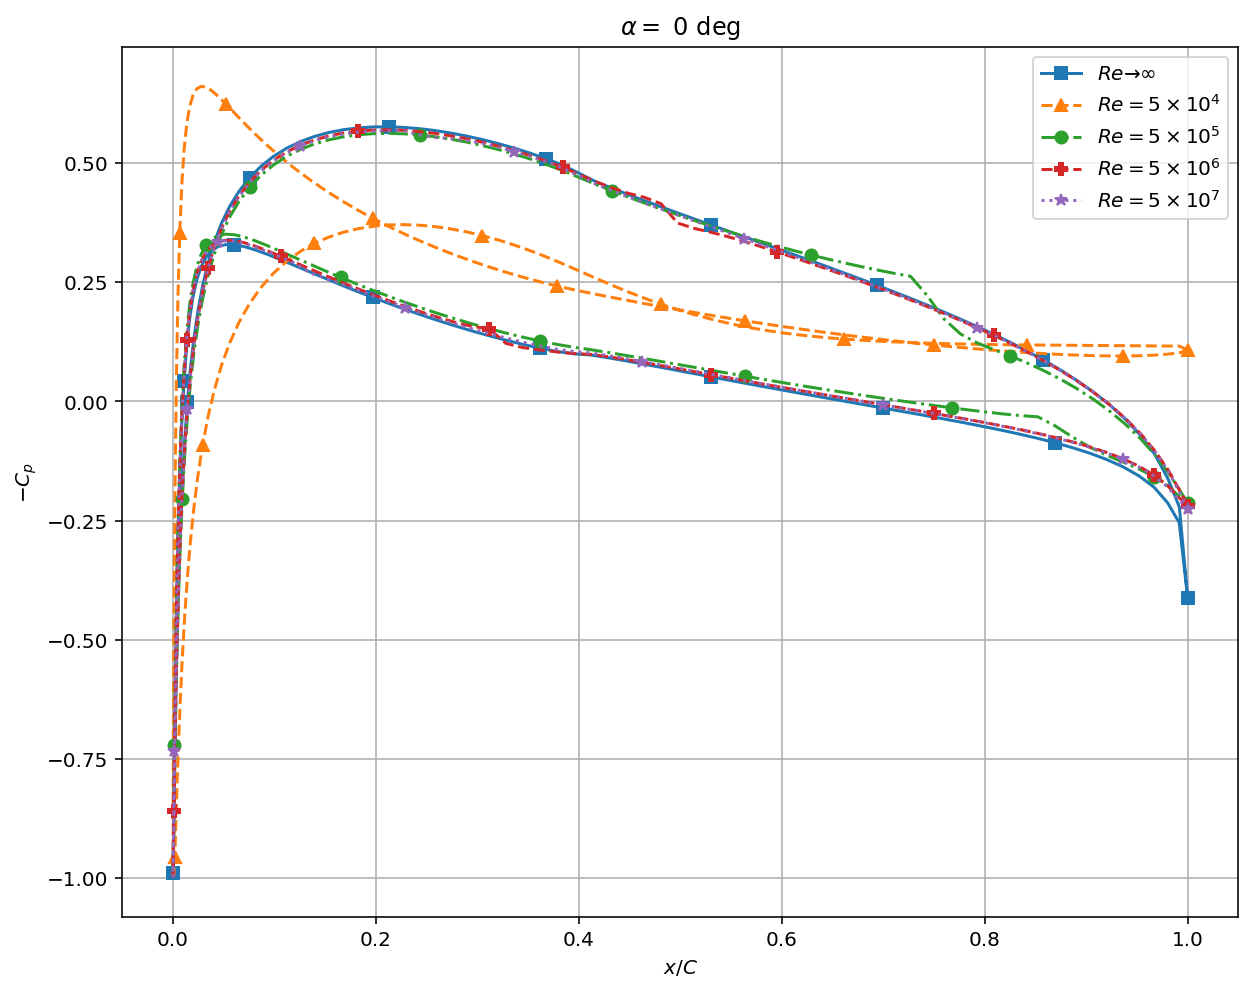

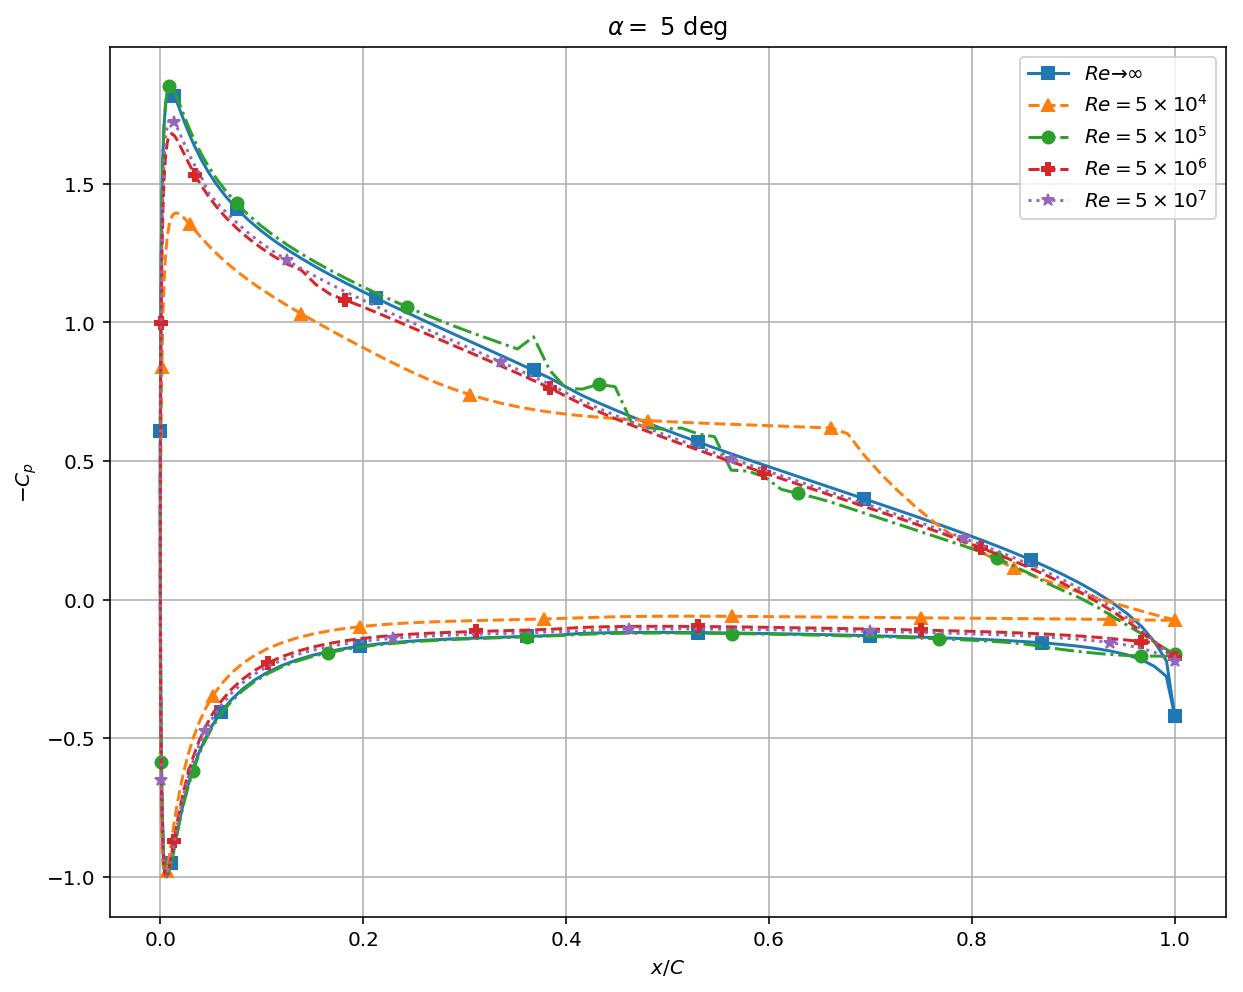

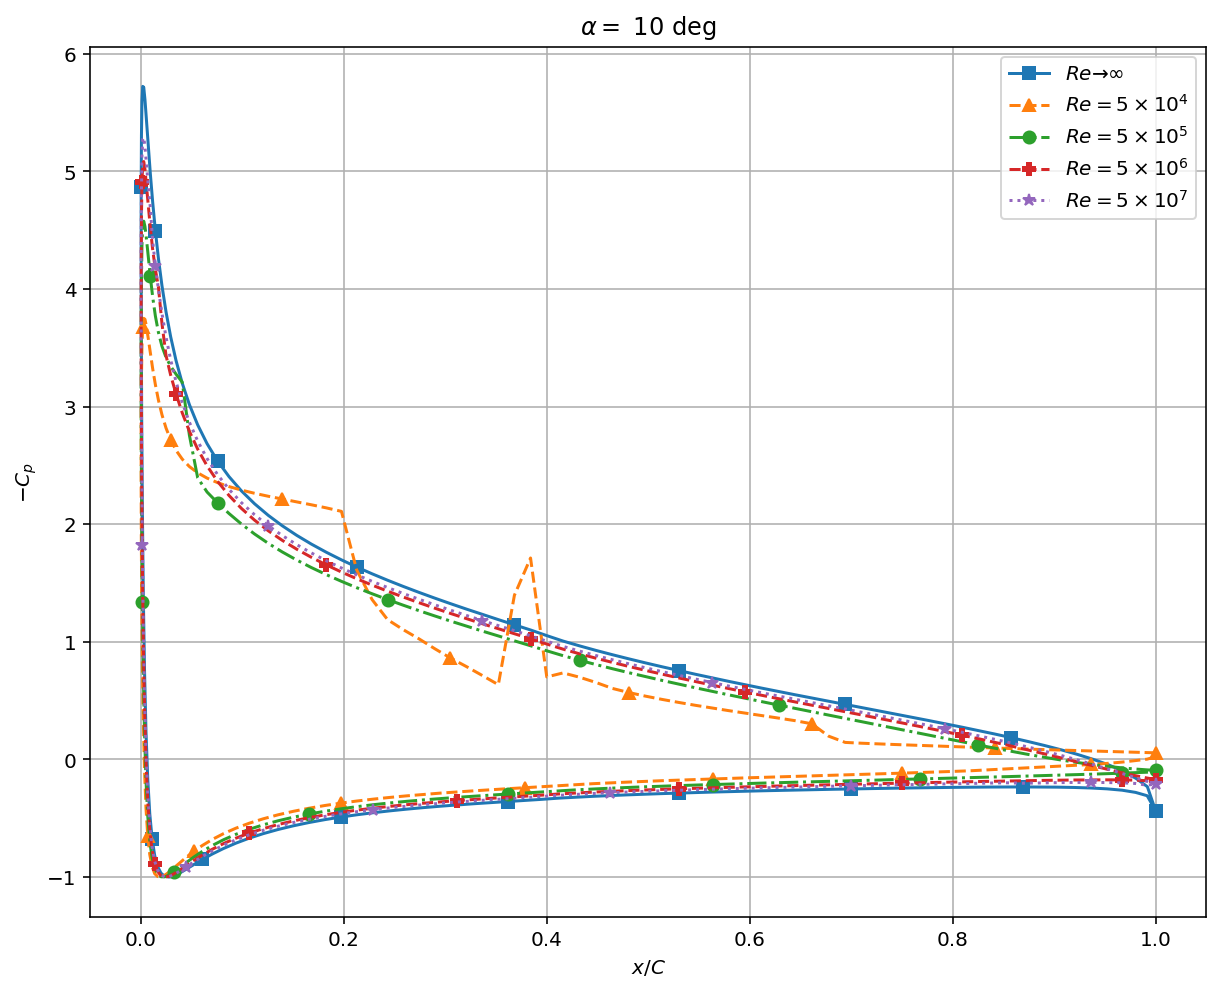

In [4]:
for alfa in aoa:
    append_name = 'ALFA_{0:02d}'.format(alfa)
    data_aoa = data[append_name]
    fig=plt.figure(figsize=(10,8))
    for iconf,conf in enumerate(config):
        plt.plot(data_aoa[conf]['x'],-data_aoa[conf]['Cp'],label='{0:s}'.format(config_names[iconf]),linestyle=config_styles[iconf],marker=config_markers[iconf],markevery=10+iconf)
    plt.xlabel(r'$x/C$');
    plt.ylabel(r'$-C_p$');
    plt.grid();
    plt.title(r'$\alpha = $ {0:d} deg'.format(alfa));
    plt.legend();

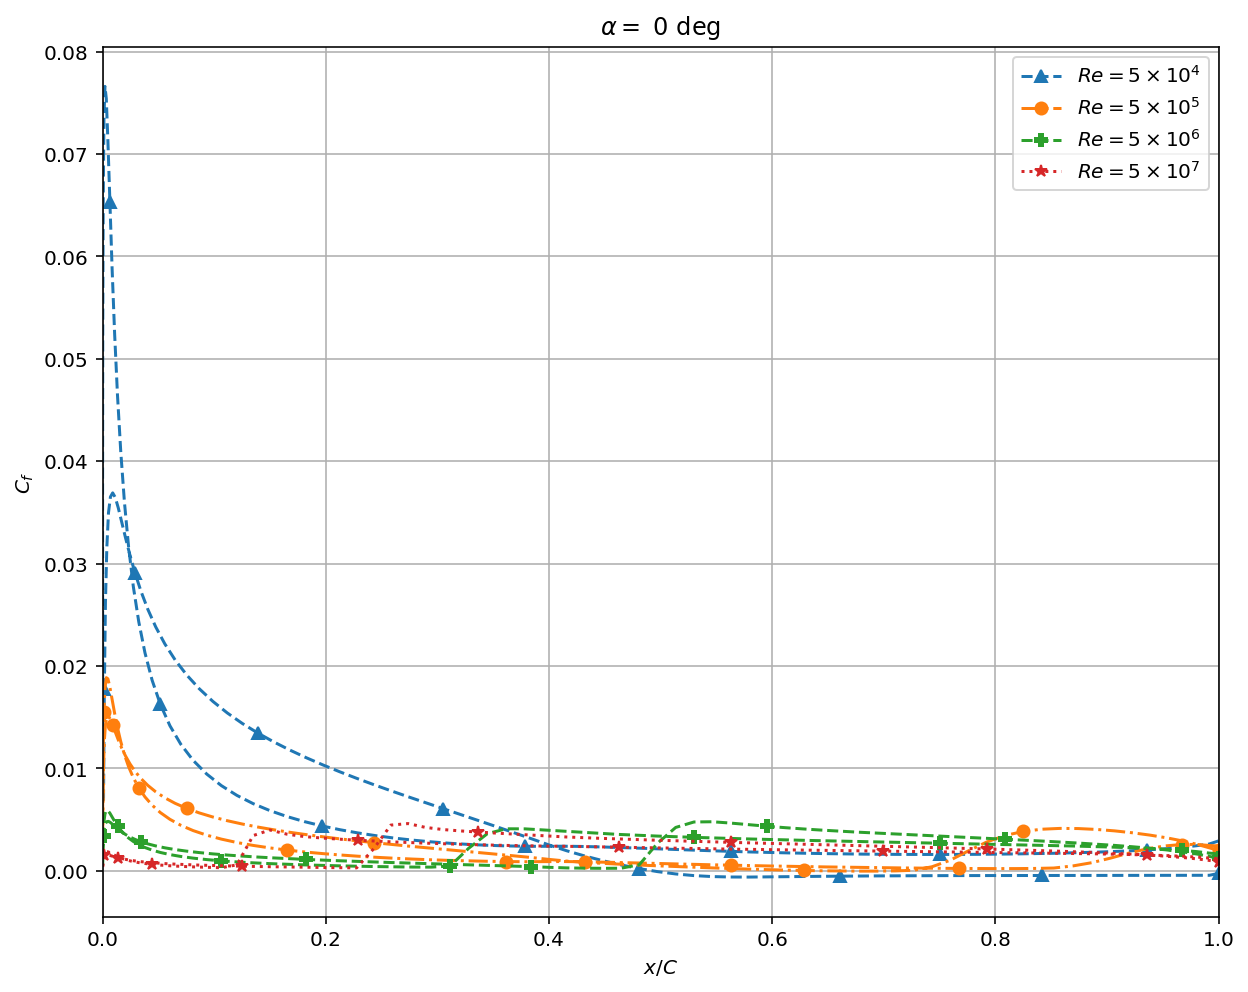

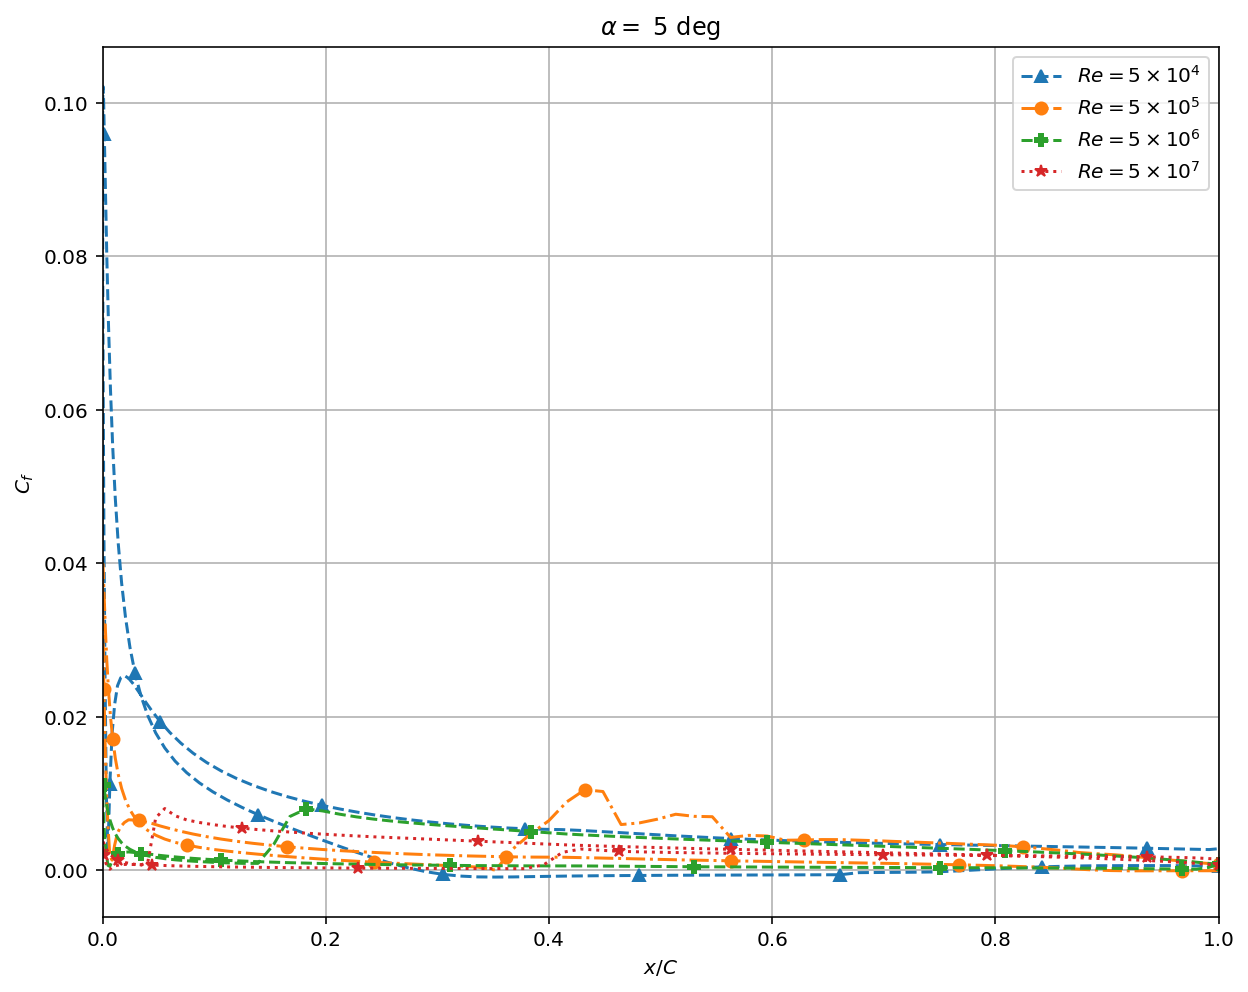

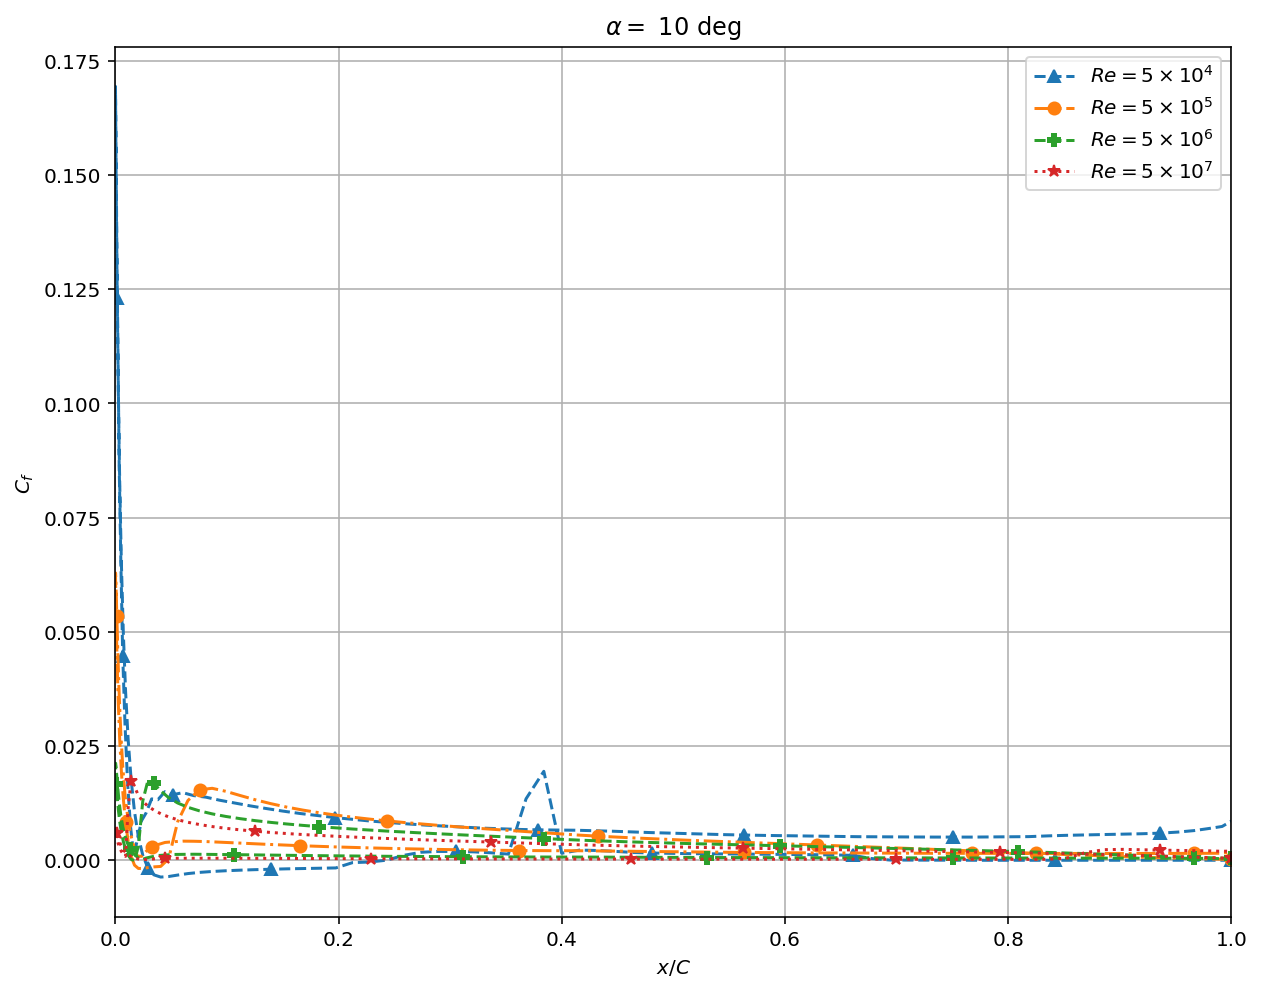

In [5]:
for alfa in aoa:
    append_name = 'ALFA_{0:02d}'.format(alfa)
    data_aoa = data[append_name]
    fig=plt.figure(figsize=(10,8))
    for iconf,conf in enumerate(config):
        if iconf>0:
            plt.plot(data_aoa[conf]['x'],data_aoa[conf]['Cf'],label='{0:s}'.format(config_names[iconf]),linestyle=config_styles[iconf],marker=config_markers[iconf],markevery=10+iconf)
    plt.xlabel(r'$x/C$');
    plt.ylabel(r'$C_f$');
    plt.grid();
    plt.title(r'$\alpha = $ {0:d} deg'.format(alfa));
    plt.legend();
    plt.xlim(0,1.)

# Exercice 2
Plot polar

In [6]:
config         = ['IVISC','VISC_RE5e4_DEF','VISC_RE5e5_DEF','VISC_RE5e6_DEF','VISC_RE5e7_DEF']
config_names   = [r'$Re\to \infty$',r'$Re = 5\times 10^4$',r'$Re = 5\times 10^5$',r'$Re = 5\times 10^6$',r'$Re = 5\times 10^7$']
config_styles  = ['-','--','-.','--',':']
config_markers = ['s','^','o','P','*','d']

In [7]:
data_polar = dict()
for iconf,conf in enumerate(config):
    prefix = 'POLAR_XFOIL_2412'
    filename = '{0:s}/{1:s}_{2:s}.TXT'.format(dir_results,prefix,conf)
    tmp = np.loadtxt(filename,skiprows=12)
    conf_data = dict()
    conf_data['aoa'] = tmp[:,0]
    conf_data['CL'] = tmp[:,1]
    conf_data['CDv'] = tmp[:,2]
    conf_data['CDp'] = tmp[:,3]
    data_polar[conf] = conf_data

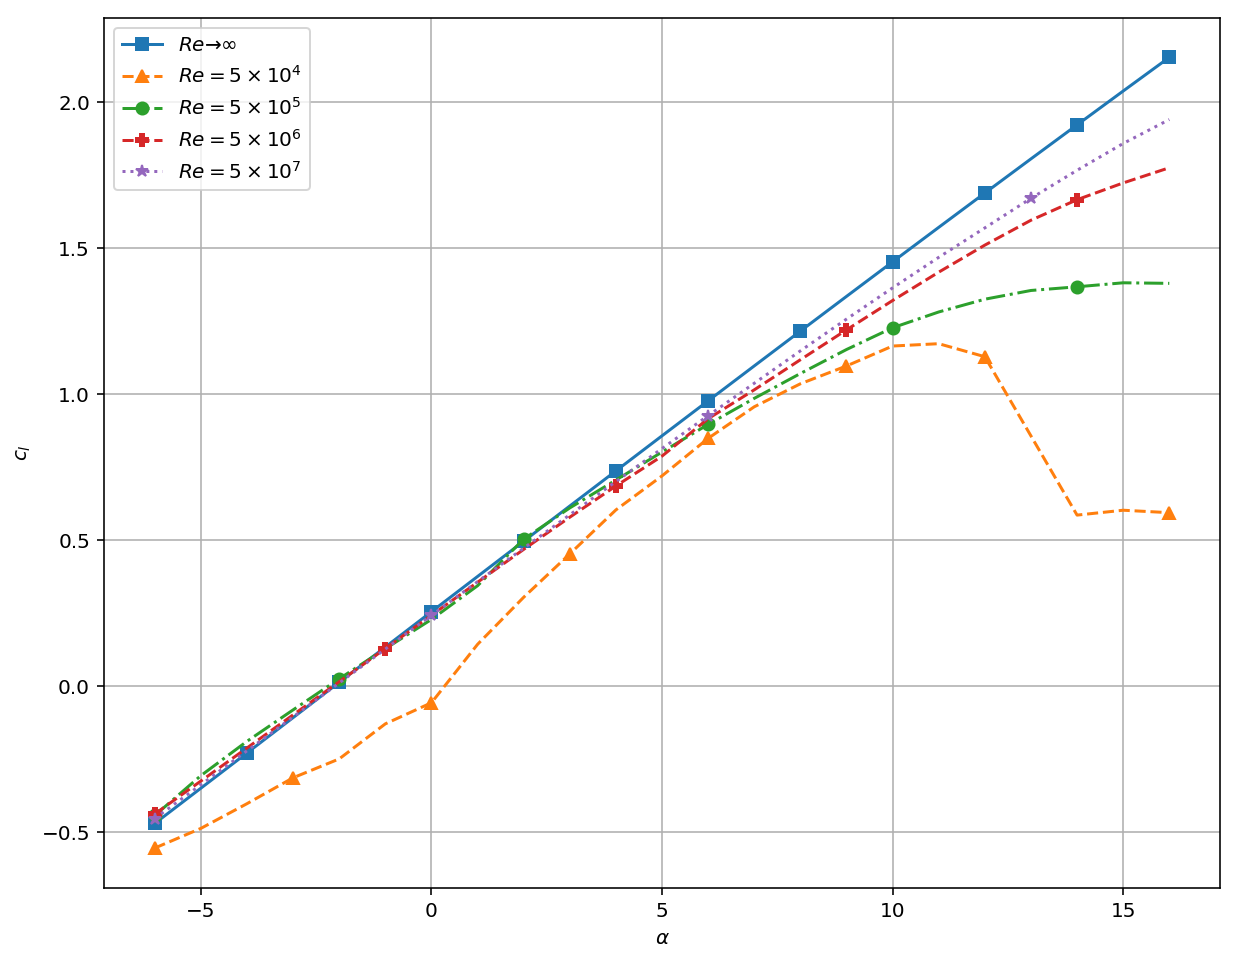

In [8]:
fig=plt.figure(figsize=(10,8))
for iconf,conf in enumerate(config):
    plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CL'],label='{0:s}'.format(config_names[iconf]),linestyle=config_styles[iconf],marker=config_markers[iconf],markevery=2+iconf)
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$c_l$');
plt.grid();
plt.legend();

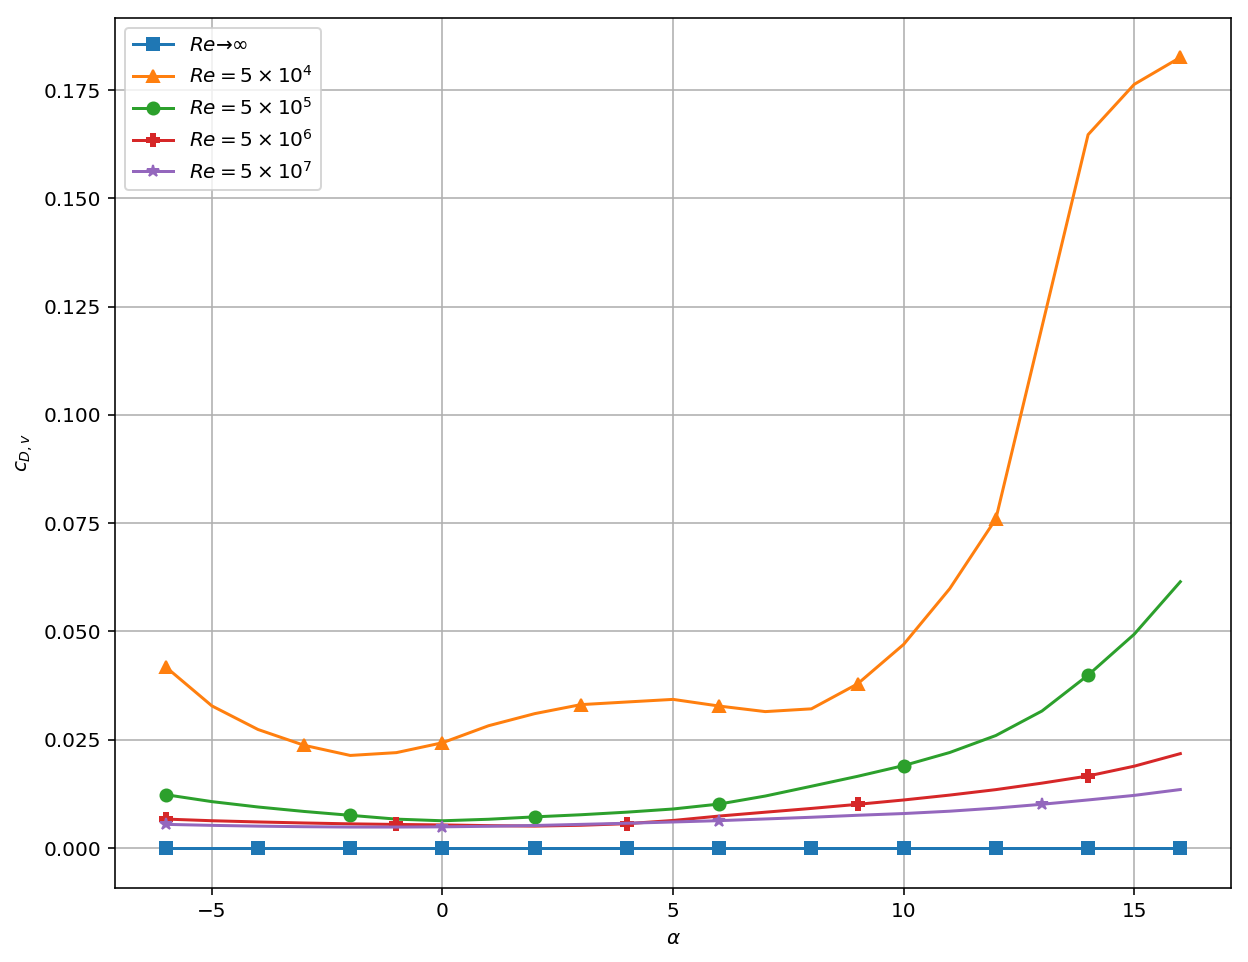

In [9]:
fig=plt.figure(figsize=(10,8))
for iconf,conf in enumerate(config):
    plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CDv'],label='{0:s}'.format(config_names[iconf]),linestyle='-',marker=config_markers[iconf],markevery=2+iconf,color='C{0:d}'.format(iconf))
    #plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CDp'],label='{0:s}'.format(config_names[iconf]),linestyle='--',marker=config_markers[iconf],markevery=10+iconf,color='C{0:d}'.format(iconf))
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$c_{D,v}$');
plt.grid();
plt.legend();

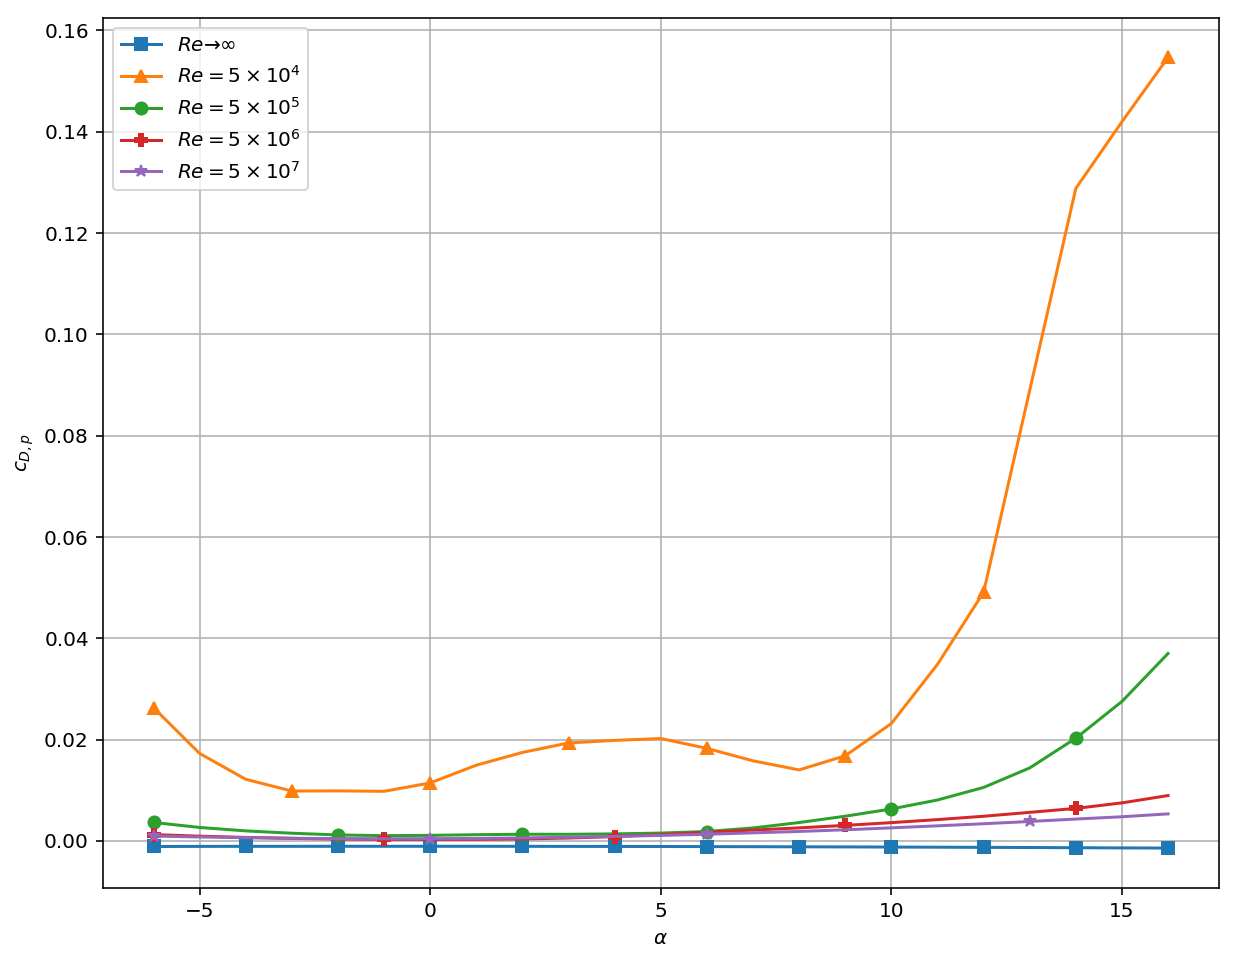

In [10]:
fig=plt.figure(figsize=(10,8))
for iconf,conf in enumerate(config):
    plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CDp'],label='{0:s}'.format(config_names[iconf]),linestyle='-',marker=config_markers[iconf],markevery=2+iconf,color='C{0:d}'.format(iconf))
    #plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CDp'],label='{0:s}'.format(config_names[iconf]),linestyle='--',marker=config_markers[iconf],markevery=10+iconf,color='C{0:d}'.format(iconf))
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$c_{D,p}$');
plt.grid();
plt.legend();

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


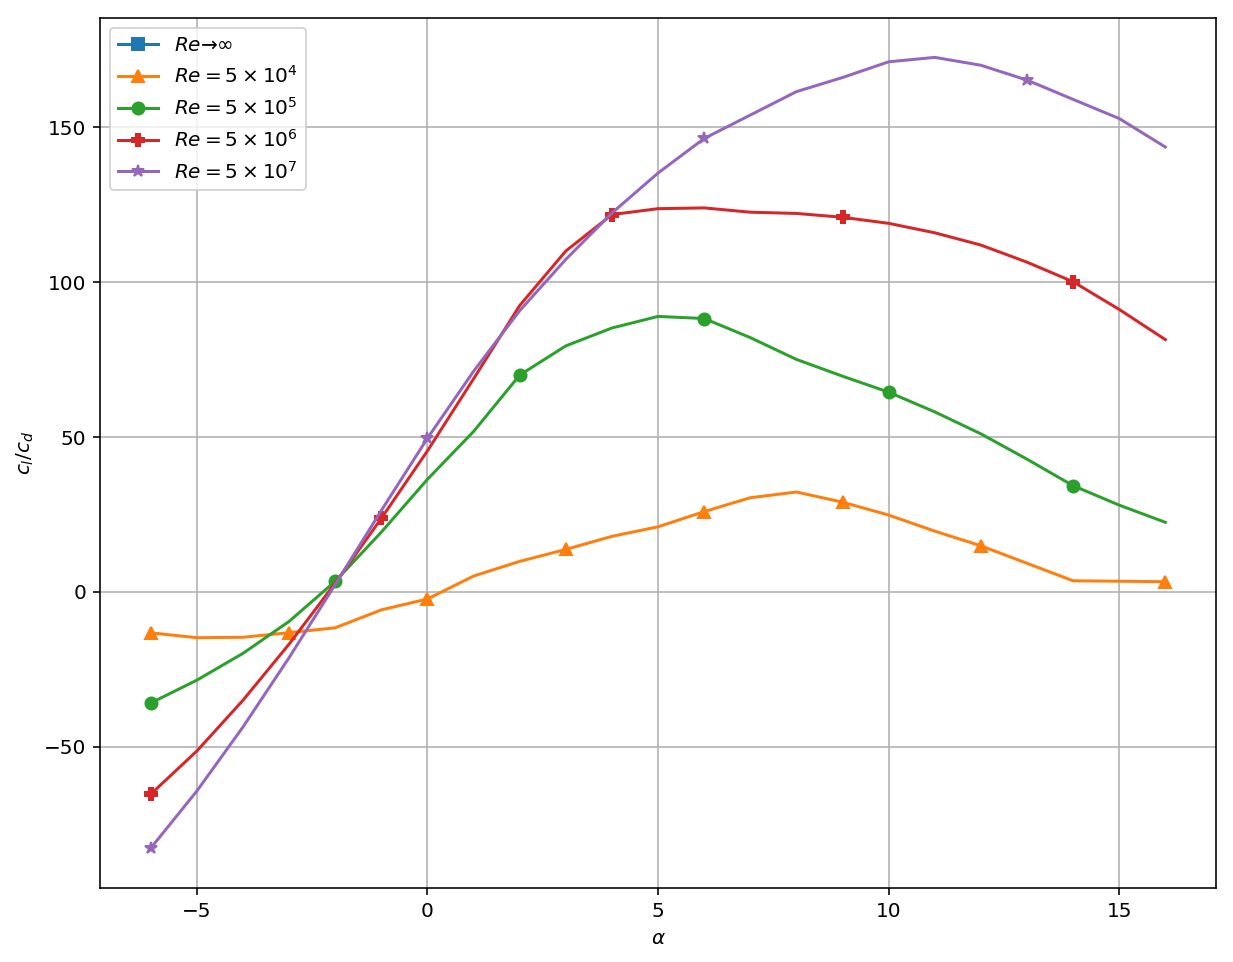

In [11]:
fig=plt.figure(figsize=(10,8))
for iconf,conf in enumerate(config):
    plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CL']/data_polar[conf]['CDv'],label='{0:s}'.format(config_names[iconf]),linestyle='-',marker=config_markers[iconf],markevery=2+iconf,color='C{0:d}'.format(iconf))
    #plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CDp'],label='{0:s}'.format(config_names[iconf]),linestyle='--',marker=config_markers[iconf],markevery=10+iconf,color='C{0:d}'.format(iconf))
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$c_l/c_d$');
plt.grid();
plt.legend();

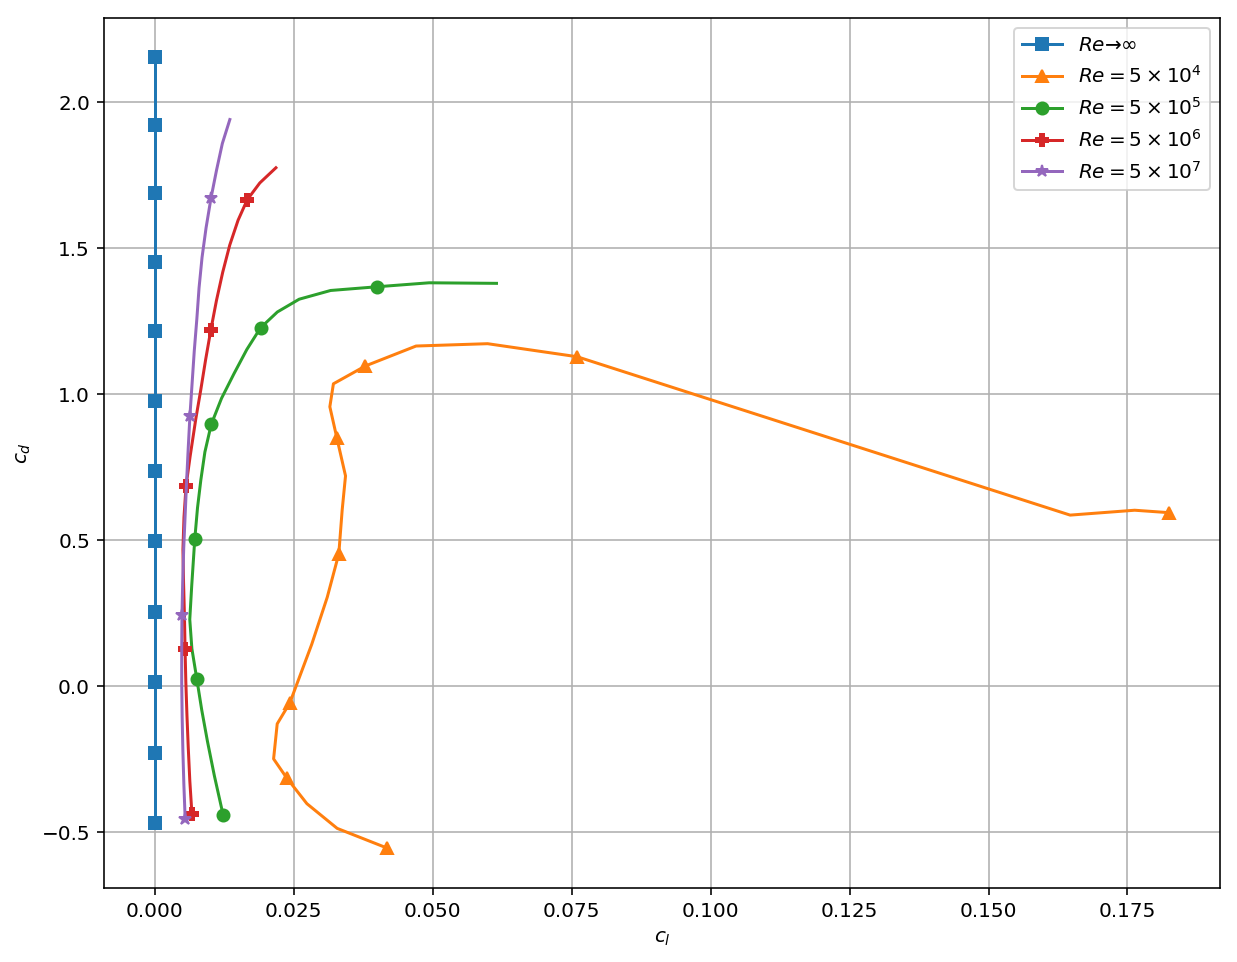

In [12]:
fig=plt.figure(figsize=(10,8))
for iconf,conf in enumerate(config):
    plt.plot(data_polar[conf]['CDv'],data_polar[conf]['CL'],label='{0:s}'.format(config_names[iconf]),linestyle='-',marker=config_markers[iconf],markevery=2+iconf,color='C{0:d}'.format(iconf))
    #plt.plot(data_polar[conf]['aoa'],data_polar[conf]['CDp'],label='{0:s}'.format(config_names[iconf]),linestyle='--',marker=config_markers[iconf],markevery=10+iconf,color='C{0:d}'.format(iconf))
plt.xlabel(r'$c_l$');
plt.ylabel(r'$c_d$');
plt.grid();
plt.legend();